# Graph/Network Mining

Graps or Networks are a powerful data representation tool as they can capture various types of objects/entities and their relationships. Think about the datasets that we have explored so far, where we assume that each instance is independent of the other, and there is no explicit relationship between instances. Please go over the slides to learn key terminologies in graph/network. 

The word graph occurs predominantly in mathematics to represent abstract relationships between entities. On the other hand, the word network is used when the context is explicit. E.g., computer networks, social networks, and gene regulatory networks. In this module, we will use the terms graph and network interchangeably. 


There are two broad categories of graph mining problems: 

1. Problem Type 1: Given a network, infer interesting properties of the network, such as identifying influential nodes and detecting communities.
2. Problem Type 2: Given a set of networks, infer network patterns (e.g. a subnetwork) prevalent across these networks. This problem is also known as **frequent subgraph mining**.

In this module, we will explore Type 1. 

## Graph Analysis with networkx library

In this module, we will explore `networkx` library, which is a powerful library for workign with graph dataset. Let's begin with a toy graph. 

### Environment Set up

In [1]:
import sys
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms.community.modularity_max import naive_greedy_modularity_communities
from networkx.algorithms.community.centrality import girvan_newman
%matplotlib inline

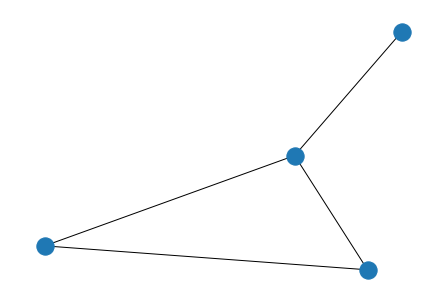

In [2]:
g=nx.Graph() #create a blank graph

g.add_edge('a','b') #insert an edge into the graph; nodes will be inserted automatically
g.add_edge('b','c')
g.add_edge('c','a')
g.add_edge('b','d')

nx.draw(g) #draw the graph

We can also show the nodes and links. 

In [3]:
print(g.nodes())

['a', 'b', 'c', 'd']


In [4]:
print(g.edges())

[('a', 'b'), ('a', 'c'), ('b', 'c'), ('b', 'd')]


In [5]:
len(g)  # shows the number of nodes

4

In [6]:
g.number_of_nodes()

4

In [7]:
g.number_of_edges()

4

A graph data structure in NetworkX is just like a Python dict—everything can be looked up nearly instantaneously, one just has to know the key:

In [8]:
g.nodes['a']  # it will show empty dict as there is no property for this node

{}

In [9]:
g.nodes['a']['count'] = 10   # Add a property (count) to this node
g.nodes['a']['name'] = "Node 1"   # Add a property (count) to this node

In [10]:
g.nodes['a']

{'count': 10, 'name': 'Node 1'}

We can also access the neigborhood of a node. 

In [11]:
g['a']   #returns a dict of neighbors and edge attributes

AtlasView({'b': {}, 'c': {}})

In [12]:
g['a']['b'] #returns the attributes of the edge A->B

{}

In [13]:
g['a']['b']['weight'] = 1.5  #sets an attribute of the edge

In [14]:
g['a']['b']

{'weight': 1.5}

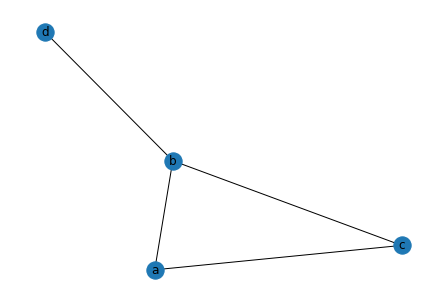

In [15]:
nx.draw(g, with_labels = True)

Degree of a node is an important property. We can access degree property as follows: 

In [16]:
g.degree('b')  # get the degree of node

3

In [17]:
g.degree()

DegreeView({'a': 2, 'b': 3, 'c': 2, 'd': 1})

In [18]:
deg = g.degree()  # get the degree distribution
print(deg)

[('a', 2), ('b', 3), ('c', 2), ('d', 1)]


In [19]:
min(deg, key=lambda x: x[1]) # min degree

('d', 1)

In [20]:
max(deg, key=lambda x: x[1]) # max degree

('b', 3)

In [21]:
sorted_degrees = sorted(deg, key=lambda x: x[1], reverse=True)
sorted_degrees[:2]  # top 2 nodes in terms of degrees

[('b', 3), ('a', 2)]

We now have some preliminary ideas about networkx library. Let's explore a bit complex network. 

### Zachary’s Karate Club

This network models the relationships between 34 members of a karate club: each node represents an individual, and the links/edges represent individuals who interact outside of the karate club setting (e.g., spending social time together, like meeting up for a coffee, separate to karate).

The network has two main players the 'Officer' - John A (node 33) and the instructor - Mr. Hi (node 0). And the story goes that a rift occurred between Mr. Hi and John A, causing the karate club to splinter into two new clubs (or factions). John A led one club, and Mr. Hi led the other. 

One might expect that each member's decision to join either faction would be driven by their relationships with the club's other members. So if we have a model of the relationships between the individuals (i.e. the network) we should be able to predict with faction each person will join. As you will see, network analysis gives us the power to do just that!

### Import the ZKC network

This network is built-in within the package, and we can load this network with a function. 

In [22]:
ZKC_graph = nx.karate_club_graph()

### Find the number of nodes and edges

In [23]:
ZKC_graph.number_of_nodes()  # number of nodes

34

In [24]:
ZKC_graph.number_of_edges()  # number of nodes

78

### Visualize the network

We will now explore some graph visualizing techniques.

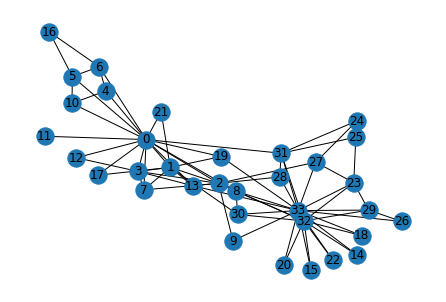

In [25]:
nx.draw(ZKC_graph, with_labels = True)

The above plot is hard to read. We can change the drawing options. 

In [26]:
options = {
    "font_size": 18,
    "node_size": 800,
    "node_color": "red",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 3,
}

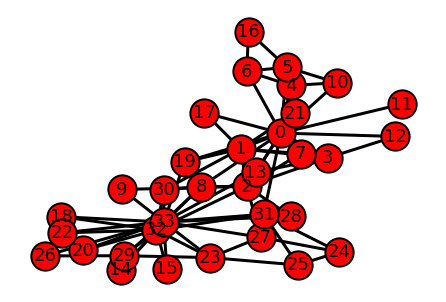

In [27]:
nx.draw(ZKC_graph, with_labels = True, **options)

There are various layouts available. See [here](https://networkx.org/documentation/stable/reference/drawing.html)

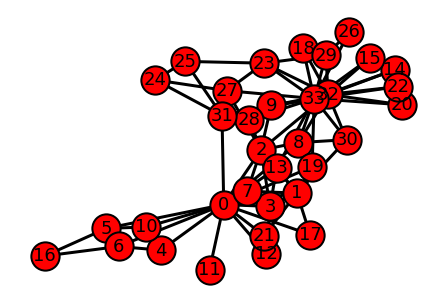

In [28]:
layout = nx.spring_layout(ZKC_graph)
nx.draw(ZKC_graph, layout, with_labels = True, **options)

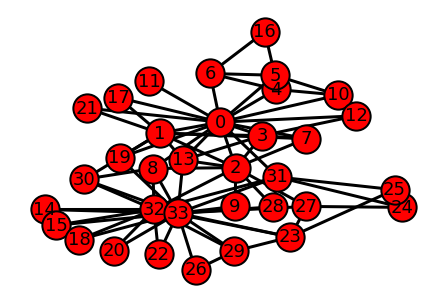

In [29]:
layout = nx.kamada_kawai_layout(ZKC_graph)
nx.draw(ZKC_graph, layout, with_labels = True, **options)

### Network Statistics: Degree Distribution

In [30]:
#the degree function in networkx returns a DegreeView object capable of iterating through (node, degree) pairs
deg = ZKC_graph.degree()

In [31]:
min(deg, key=lambda x: x[1]) # min degree

(11, 1)

In [32]:
max(deg, key=lambda x: x[1]) # max degree

(33, 17)

In [33]:
sorted_degrees = sorted(deg, key=lambda x: x[1], reverse=True)
sorted_degrees[:5]  # top 2 nodes in terms of degrees

[(33, 17), (0, 16), (32, 12), (2, 10), (1, 9)]

Here node 33 and node 0 denote the 'Officer' John A  and the instructor Mr. Hi, respectively. As both of them are center figures, it is expected that their degrees are more compared to others. 

In [34]:
avg_degree = sum([d for n, d in deg]) / ZKC_graph.number_of_nodes()
avg_degree

4.588235294117647

We can plot a degree distribution for this network. 

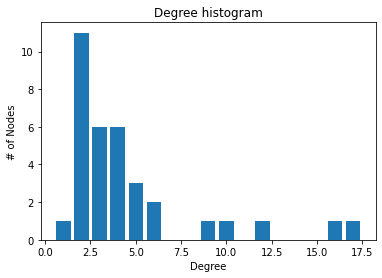

In [35]:
degree_sequence = sorted([d for n, d in ZKC_graph.degree()], reverse=True)

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.title("Degree histogram")
plt.xlabel("Degree")
plt.ylabel("# of Nodes");

This distribution is similar to what we might expect given the visualisation of the graph. The majority of members of the club do not have very many links (most have 2 or 3 links) but a few nodes (which in our case correspond to Mr Hi and John A) have a lot of links.

## Community Detection

There are many ways to approach community detection in networks. We will use centraliy-based method `girvan_newman` (see [here](https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community)). The Girvan–Newman algorithm detects communities by progressively removing edges from the original graph. The algorithm removes the “most valuable” edge, traditionally the edge with the highest betweenness centrality, at each step. As the graph breaks down into pieces, the tightly knit community structure is exposed

In [36]:
communities = girvan_newman(ZKC_graph)

In [37]:
node_groups = []
for com in next(communities):
  node_groups.append(list(com))
print(node_groups)

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


In [38]:
print(f"Num of communities = {len(node_groups)}")

Num of communities = 2


We can visualize these communities as follows: 

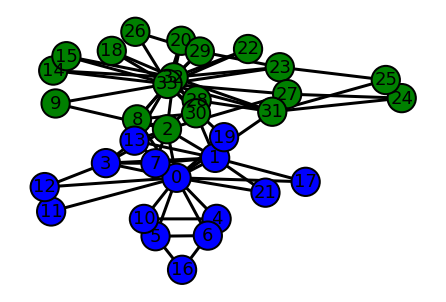

In [39]:
color_map = []
for node in ZKC_graph:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
        

options = {
    "font_size": 18,
    "node_size": 800,
    "edgecolors": "black",
    "linewidths": 2,
    "width": 3,
}
layout = nx.spring_layout(ZKC_graph)
nx.draw(ZKC_graph, layout, node_color=color_map, with_labels=True, **options)